In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt



In [2]:
%matplotlib inline

In [3]:
import keras

Using TensorFlow backend.
/home/alexey/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alexey/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alexey/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alexey/.local/lib/python3.6/site-packages/tensorflow/python

https://keras.io/examples/timeseries/timeseries_weather_forecasting/

In [4]:
from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)


In [5]:
!head {csv_path}

"Date Time","p (mbar)","T (degC)","Tpot (K)","Tdew (degC)","rh (%)","VPmax (mbar)","VPact (mbar)","VPdef (mbar)","sh (g/kg)","H2OC (mmol/mol)","rho (g/m**3)","wv (m/s)","max. wv (m/s)","wd (deg)"
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30
01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50
01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,

In [6]:
weather_df = pd.read_csv(csv_path)

In [7]:
weather_df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [8]:
weather_df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [9]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
Date Time          420551 non-null object
p (mbar)           420551 non-null float64
T (degC)           420551 non-null float64
Tpot (K)           420551 non-null float64
Tdew (degC)        420551 non-null float64
rh (%)             420551 non-null float64
VPmax (mbar)       420551 non-null float64
VPact (mbar)       420551 non-null float64
VPdef (mbar)       420551 non-null float64
sh (g/kg)          420551 non-null float64
H2OC (mmol/mol)    420551 non-null float64
rho (g/m**3)       420551 non-null float64
wv (m/s)           420551 non-null float64
max. wv (m/s)      420551 non-null float64
wd (deg)           420551 non-null float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [10]:
weather_df["dt_gen_h1_pred"] = pd.to_datetime(weather_df["Date Time"], format="%d.%m.%Y %H:%M:%S")

In [11]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 16 columns):
Date Time          420551 non-null object
p (mbar)           420551 non-null float64
T (degC)           420551 non-null float64
Tpot (K)           420551 non-null float64
Tdew (degC)        420551 non-null float64
rh (%)             420551 non-null float64
VPmax (mbar)       420551 non-null float64
VPact (mbar)       420551 non-null float64
VPdef (mbar)       420551 non-null float64
sh (g/kg)          420551 non-null float64
H2OC (mmol/mol)    420551 non-null float64
rho (g/m**3)       420551 non-null float64
wv (m/s)           420551 non-null float64
max. wv (m/s)      420551 non-null float64
wd (deg)           420551 non-null float64
dt_gen_h1_pred     420551 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(14), object(1)
memory usage: 51.3+ MB


Будем предсказывать температуру через 10 минут

In [12]:
weather_df_daliy = weather_df.set_index("dt_gen_h1_pred").resample('D').max().reset_index()

In [13]:
weather_df_daliy["value_at_gentime"] = weather_df_daliy["T (degC)"]

In [14]:
del weather_df_daliy["Date Time"]
del weather_df_daliy["T (degC)"]

In [15]:
weather_df_daliy

,dt_gen_h1_pred,p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),value_at_gentime
0,2009-01-01,1000.87,269.00,-5.36,94.8,4.48,4.09,0.49,2.55,4.09,1318.81,2.51,3.63,357.9,-4.17
1,2009-01-02,1002.65,271.12,-3.88,96.3,5.22,4.58,0.70,2.86,4.59,1298.51,3.87,6.13,358.8,-2.12
2,2009-01-03,1002.49,272.59,-6.09,93.9,5.75,3.87,2.86,2.41,3.86,1323.70,3.64,4.88,357.2,-0.82
3,2009-01-04,992.93,273.55,-2.26,93.9,5.83,5.17,1.53,3.27,5.25,1274.06,3.95,7.13,257.0,-0.63
4,2009-01-05,997.54,272.89,-2.45,93.2,5.49,5.10,0.83,3.23,5.18,1332.38,7.81,10.88,358.9,-1.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2016-12-28,1015.35,278.53,3.11,91.9,9.55,7.64,2.19,4.70,7.54,1275.20,4.08,7.45,348.3,6.29
2919,2016-12-29,1015.21,276.65,2.43,98.1,8.46,7.28,1.79,4.47,7.17,1297.30,2.04,2.80,344.8,4.55
2920,2016-12-30,1012.55,276.11,2.97,98.2,7.95,7.56,1.70,4.67,7.49,1312.47,2.20,3.77,282.7,3.67
2921,2016-12-31,1008.67,278.12,-3.04,91.8,8.86,4.88,4.03,3.03,4.86,1314.79,1.49,2.75,333.3,5.21


In [16]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [17]:
weather_df_daliy["target_value"] = weather_df_daliy.value_at_gentime.shift(-1).fillna(0)
weather_df_daliy["dt_target"] = weather_df_daliy.dt_gen_h1_pred.shift(-1)

weather_df_daliy = weather_df_daliy.iloc[0:2855,:].copy()
# за 2016-10-26 и 2016-10-27 нет данных

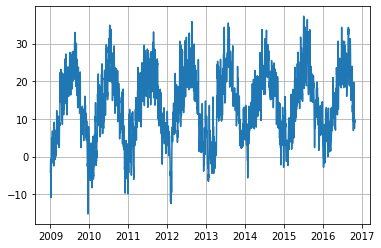

In [18]:
plt.plot(weather_df_daliy["dt_gen_h1_pred"], weather_df_daliy.value_at_gentime)
plt.grid(True)

In [19]:
weather_df_daliy.head()

,dt_gen_h1_pred,p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),value_at_gentime,target_value,dt_target
0,2009-01-01,1000.87,269.00,-5.36,94.8,4.48,4.09,0.49,2.55,4.09,1318.81,2.51,3.63,357.9,-4.17,-2.12,2009-01-02
1,2009-01-02,1002.65,271.12,-3.88,96.3,5.22,4.58,0.70,2.86,4.59,1298.51,3.87,6.13,358.8,-2.12,-0.82,2009-01-03
2,2009-01-03,1002.49,272.59,-6.09,93.9,5.75,3.87,2.86,2.41,3.86,1323.70,3.64,4.88,357.2,-0.82,-0.63,2009-01-04
3,2009-01-04,992.93,273.55,-2.26,93.9,5.83,5.17,1.53,3.27,5.25,1274.06,3.95,7.13,257.0,-0.63,-1.44,2009-01-05
4,2009-01-05,997.54,272.89,-2.45,93.2,5.49,5.10,0.83,3.23,5.18,1332.38,7.81,10.88,358.9,-1.44,-10.88,2009-01-06


In [20]:
weather_df_daliy.tail(7)

,dt_gen_h1_pred,p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),value_at_gentime,target_value,dt_target
2848,2016-10-19,990.89,284.31,8.42,96.1,12.36,11.05,4.25,6.98,11.17,1228.47,5.24,8.41,347.7,10.08,9.31,2016-10-20
2849,2016-10-20,987.30,283.57,5.13,95.7,11.74,8.81,3.72,5.57,8.93,1230.43,3.68,5.67,359.1,9.31,9.13,2016-10-21
2850,2016-10-21,987.57,283.39,4.89,95.3,11.59,8.66,3.49,5.47,8.77,1232.41,4.64,6.81,356.7,9.13,7.50,2016-10-22
2851,2016-10-22,988.69,281.76,5.78,97.0,10.38,9.22,1.87,5.83,9.34,1236.99,1.99,4.16,342.7,7.50,9.94,2016-10-23
2852,2016-10-23,989.06,284.11,6.14,98.7,12.24,9.45,3.13,5.97,9.57,1238.98,2.64,3.84,350.5,9.94,9.06,2016-10-24
2853,2016-10-24,989.41,283.24,8.66,98.5,11.54,11.23,1.41,7.11,11.38,1230.65,3.21,4.53,356.5,9.06,9.48,2016-10-25
2854,2016-10-25,994.76,283.07,8.35,98.6,11.87,11.00,0.90,6.91,11.06,1224.99,1.74,3.80,359.5,9.48,0.00,2016-10-26


In [21]:
from argparse import Namespace

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error

In [23]:
weather_df_daliy["target_value"].isna().value_counts()

False    2855
Name: target_value, dtype: int64

In [24]:
weather_df_daliy["value_at_gentime"].isna().value_counts()

False    2855
Name: value_at_gentime, dtype: int64

In [25]:
def quality(df, pred_name, target_name="target_value"):
    quality = Namespace()
    
    quality.prediction_name = pred_name
    y_true = df[target_name]
    y_pred = df[pred_name]
    
    quality.rmse = np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))
    
    quality.mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
    quality.mape = mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    quality.median_ae = median_absolute_error(y_true=y_true, y_pred=y_pred)
    
    return quality

In [26]:
q_inertial = quality(
    df = weather_df_daliy,
    pred_name="value_at_gentime"
)

In [27]:
q_inertial

Namespace(mae=2.615338003502627, mape=19465646025132.617, median_ae=2.1000000000000014, prediction_name='value_at_gentime', rmse=3.4089110329873846)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [28]:
from sklearn.model_selection import TimeSeriesSplit

In [29]:
ts_cv_1 = TimeSeriesSplit(n_splits = 5, max_train_size=1000,test_size=300, gap=5)

In [30]:
def show_splits(tss, df):
    plt.figure(figsize=(10,7))
    plt.plot(df["dt_target"], np.ones_like(df["dt_target"], "int") *  -1)

    for n, (train_index, test_index) in enumerate(tss.split(X=df.loc[:,["target_value"]])):
        X_train = df.loc[:,["target_value"]].iloc[train_index]
        X_test = df.loc[:,["target_value"]].iloc[test_index]

        y_train = df.target_value.iloc[train_index]
        y_test = df.target_value.iloc[test_index]

        dt_train = df["dt_target"].iloc[train_index]
        dt_test = df["dt_target"].iloc[test_index]


        plt.plot(dt_train, np.ones_like(dt_train, "int") * n)
        plt.plot(dt_test, np.ones_like(dt_test, "int") * n)
        plt.grid(True)

    plt.show()
    


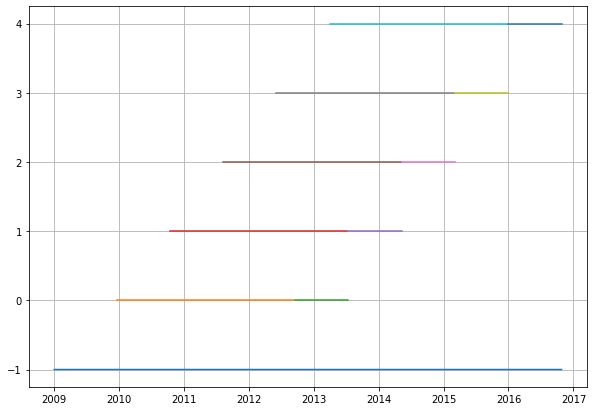

In [31]:
show_splits(ts_cv_1, df= weather_df_daliy)

In [32]:
ts_cv_2 = TimeSeriesSplit(n_splits = 5, max_train_size=150,test_size=25, gap=5)

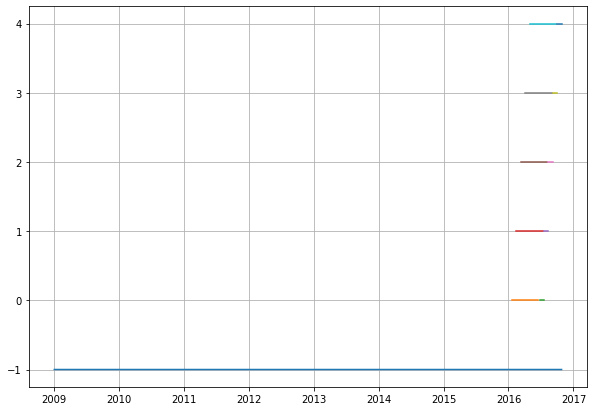

In [33]:
show_splits(ts_cv_2,  df= weather_df_daliy)

In [34]:
ts_cv_3 = TimeSeriesSplit(n_splits = 5, max_train_size=None,test_size=250, gap=5)

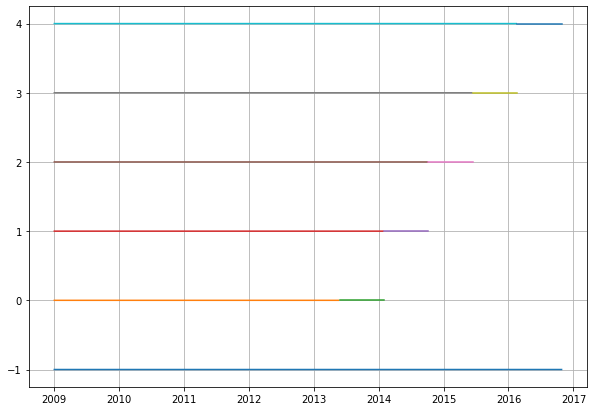

In [35]:
show_splits(ts_cv_3,  df= weather_df_daliy)

In [36]:
# Feature Engineering

In [37]:
weather_df_daliy

,dt_gen_h1_pred,p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),value_at_gentime,target_value,dt_target
0,2009-01-01,1000.87,269.00,-5.36,94.8,4.48,4.09,0.49,2.55,4.09,1318.81,2.51,3.63,357.9,-4.17,-2.12,2009-01-02
1,2009-01-02,1002.65,271.12,-3.88,96.3,5.22,4.58,0.70,2.86,4.59,1298.51,3.87,6.13,358.8,-2.12,-0.82,2009-01-03
2,2009-01-03,1002.49,272.59,-6.09,93.9,5.75,3.87,2.86,2.41,3.86,1323.70,3.64,4.88,357.2,-0.82,-0.63,2009-01-04
3,2009-01-04,992.93,273.55,-2.26,93.9,5.83,5.17,1.53,3.27,5.25,1274.06,3.95,7.13,257.0,-0.63,-1.44,2009-01-05
4,2009-01-05,997.54,272.89,-2.45,93.2,5.49,5.10,0.83,3.23,5.18,1332.38,7.81,10.88,358.9,-1.44,-10.88,2009-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,2016-10-21,987.57,283.39,4.89,95.3,11.59,8.66,3.49,5.47,8.77,1232.41,4.64,6.81,356.7,9.13,7.50,2016-10-22
2851,2016-10-22,988.69,281.76,5.78,97.0,10.38,9.22,1.87,5.83,9.34,1236.99,1.99,4.16,342.7,7.50,9.94,2016-10-23
2852,2016-10-23,989.06,284.11,6.14,98.7,12.24,9.45,3.13,5.97,9.57,1238.98,2.64,3.84,350.5,9.94,9.06,2016-10-24
2853,2016-10-24,989.41,283.24,8.66,98.5,11.54,11.23,1.41,7.11,11.38,1230.65,3.21,4.53,356.5,9.06,9.48,2016-10-25


https://tsfresh.com/

In [38]:
#0.17.0

In [39]:
from tsfresh import extract_relevant_features, extract_features
#from tsfresh.examples.robot_execution_failures import load_robot_execution_failures



In [40]:
data = []
window_len = 90
for n in range(window_len, len(weather_df_daliy)+1):
    frame = weather_df_daliy.reset_index().iloc[n-window_len:n,:].copy()
    frame["id"] = n
    data.append(frame)
    
    

In [41]:
len(data)

2766

In [42]:
weather_df_daliy

,dt_gen_h1_pred,p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),value_at_gentime,target_value,dt_target
0,2009-01-01,1000.87,269.00,-5.36,94.8,4.48,4.09,0.49,2.55,4.09,1318.81,2.51,3.63,357.9,-4.17,-2.12,2009-01-02
1,2009-01-02,1002.65,271.12,-3.88,96.3,5.22,4.58,0.70,2.86,4.59,1298.51,3.87,6.13,358.8,-2.12,-0.82,2009-01-03
2,2009-01-03,1002.49,272.59,-6.09,93.9,5.75,3.87,2.86,2.41,3.86,1323.70,3.64,4.88,357.2,-0.82,-0.63,2009-01-04
3,2009-01-04,992.93,273.55,-2.26,93.9,5.83,5.17,1.53,3.27,5.25,1274.06,3.95,7.13,257.0,-0.63,-1.44,2009-01-05
4,2009-01-05,997.54,272.89,-2.45,93.2,5.49,5.10,0.83,3.23,5.18,1332.38,7.81,10.88,358.9,-1.44,-10.88,2009-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,2016-10-21,987.57,283.39,4.89,95.3,11.59,8.66,3.49,5.47,8.77,1232.41,4.64,6.81,356.7,9.13,7.50,2016-10-22
2851,2016-10-22,988.69,281.76,5.78,97.0,10.38,9.22,1.87,5.83,9.34,1236.99,1.99,4.16,342.7,7.50,9.94,2016-10-23
2852,2016-10-23,989.06,284.11,6.14,98.7,12.24,9.45,3.13,5.97,9.57,1238.98,2.64,3.84,350.5,9.94,9.06,2016-10-24
2853,2016-10-24,989.41,283.24,8.66,98.5,11.54,11.23,1.41,7.11,11.38,1230.65,3.21,4.53,356.5,9.06,9.48,2016-10-25


In [43]:
data[1]

,index,dt_gen_h1_pred,p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),value_at_gentime,target_value,dt_target,id
1,1,2009-01-02,1002.65,271.12,-3.88,96.3,5.22,4.58,0.70,2.86,4.59,1298.51,3.87,6.13,358.8,-2.12,-0.82,2009-01-03,91
2,2,2009-01-03,1002.49,272.59,-6.09,93.9,5.75,3.87,2.86,2.41,3.86,1323.70,3.64,4.88,357.2,-0.82,-0.63,2009-01-04,91
3,3,2009-01-04,992.93,273.55,-2.26,93.9,5.83,5.17,1.53,3.27,5.25,1274.06,3.95,7.13,257.0,-0.63,-1.44,2009-01-05,91
4,4,2009-01-05,997.54,272.89,-2.45,93.2,5.49,5.10,0.83,3.23,5.18,1332.38,7.81,10.88,358.9,-1.44,-10.88,2009-01-06,91
5,5,2009-01-06,998.49,262.51,-15.07,89.3,2.66,1.89,0.87,1.18,1.89,1374.18,3.42,4.50,358.7,-10.88,-7.45,2009-01-07,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,86,2009-03-28,977.02,284.55,3.68,87.9,11.47,7.96,4.16,5.11,8.20,1228.66,9.36,13.63,263.2,8.97,8.85,2009-03-29,91
87,87,2009-03-29,987.04,283.54,1.91,83.0,11.38,7.01,5.68,4.46,7.15,1234.63,4.46,7.00,359.8,8.85,8.27,2009-03-30,91
88,88,2009-03-30,997.17,281.89,2.02,89.6,10.94,7.07,4.48,4.44,7.11,1266.20,3.81,5.88,357.1,8.27,11.76,2009-03-31,91
89,89,2009-03-31,998.62,285.32,2.40,97.5,13.82,7.26,7.82,4.54,7.28,1282.53,4.15,6.88,343.7,11.76,13.38,2009-04-01,91


In [44]:
expanded_df = pd.concat(data)

In [45]:
y = pd.DataFrame(
    [
        {
            "target": chunk.target_value.iloc[-1], 
            "id": chunk["id"].iloc[-1],
            "value_at_gentime": chunk["value_at_gentime"].iloc[-1]
        } for chunk in data
    ]
)

In [46]:
y.set_index("id")["target"]

id
90      13.38
91      16.28
92      22.37
93      19.58
94      14.39
        ...  
2851     7.50
2852     9.94
2853     9.06
2854     9.48
2855     0.00
Name: target, Length: 2766, dtype: float64

In [47]:
expanded_df

,index,dt_gen_h1_pred,p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),value_at_gentime,target_value,dt_target,id
0,0,2009-01-01,1000.87,269.00,-5.36,94.8,4.48,4.09,0.49,2.55,4.09,1318.81,2.51,3.63,357.9,-4.17,-2.12,2009-01-02,90
1,1,2009-01-02,1002.65,271.12,-3.88,96.3,5.22,4.58,0.70,2.86,4.59,1298.51,3.87,6.13,358.8,-2.12,-0.82,2009-01-03,90
2,2,2009-01-03,1002.49,272.59,-6.09,93.9,5.75,3.87,2.86,2.41,3.86,1323.70,3.64,4.88,357.2,-0.82,-0.63,2009-01-04,90
3,3,2009-01-04,992.93,273.55,-2.26,93.9,5.83,5.17,1.53,3.27,5.25,1274.06,3.95,7.13,257.0,-0.63,-1.44,2009-01-05,90
4,4,2009-01-05,997.54,272.89,-2.45,93.2,5.49,5.10,0.83,3.23,5.18,1332.38,7.81,10.88,358.9,-1.44,-10.88,2009-01-06,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,2850,2016-10-21,987.57,283.39,4.89,95.3,11.59,8.66,3.49,5.47,8.77,1232.41,4.64,6.81,356.7,9.13,7.50,2016-10-22,2855
2851,2851,2016-10-22,988.69,281.76,5.78,97.0,10.38,9.22,1.87,5.83,9.34,1236.99,1.99,4.16,342.7,7.50,9.94,2016-10-23,2855
2852,2852,2016-10-23,989.06,284.11,6.14,98.7,12.24,9.45,3.13,5.97,9.57,1238.98,2.64,3.84,350.5,9.94,9.06,2016-10-24,2855
2853,2853,2016-10-24,989.41,283.24,8.66,98.5,11.54,11.23,1.41,7.11,11.38,1230.65,3.21,4.53,356.5,9.06,9.48,2016-10-25,2855


In [48]:
features = extract_relevant_features(
    expanded_df.loc[:, ["id", "dt_gen_h1_pred", "value_at_gentime"]], 
    y.set_index("id")["target"], 
    column_id="id", column_sort="dt_gen_h1_pred"
)

Feature Extraction: 100%|██████████| 30/30 [00:29<00:00,  1.02it/s]


In [49]:
features

,value_at_gentime__ar_coefficient__coeff_0__k_10,value_at_gentime__mean_change,"value_at_gentime__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.0",value_at_gentime__time_reversal_asymmetry_statistic__lag_1,value_at_gentime__time_reversal_asymmetry_statistic__lag_2,"value_at_gentime__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0",value_at_gentime__time_reversal_asymmetry_statistic__lag_3,"value_at_gentime__agg_linear_trend__attr_""rvalue""__chunk_len_50__f_agg_""mean""","value_at_gentime__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",value_at_gentime__mean_abs_change,...,value_at_gentime__ar_coefficient__coeff_7__k_10,"value_at_gentime__fft_coefficient__attr_""abs""__coeff_5","value_at_gentime__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""min""","value_at_gentime__fft_coefficient__attr_""imag""__coeff_41","value_at_gentime__fft_coefficient__attr_""real""__coeff_9","value_at_gentime__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)","value_at_gentime__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",value_at_gentime__number_cwt_peaks__n_5,value_at_gentime__ratio_beyond_r_sigma__r_2,"value_at_gentime__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4"
90,1.147621,0.178989,0.178989,18.691484,27.700047,0.216818,38.867760,1.0,2.168202,2.168202,...,-0.019598,78.687657,-4.242573,0.352377,11.813614,0.120552,8.903871,8.0,0.022222,2.569584
91,0.923388,0.174157,0.174157,33.073160,37.032159,0.188615,51.897612,1.0,2.163371,2.163371,...,-0.056758,96.088294,-5.261228,3.087120,30.521958,1.703632,8.071556,8.0,0.033333,2.295556
92,0.744994,0.192135,0.192135,52.305341,63.398710,0.144154,71.066872,1.0,2.181348,2.181348,...,-0.047682,112.821602,-4.159766,-1.215710,34.907865,3.205741,8.497380,8.0,0.033333,2.517856
93,0.358051,0.258427,0.258427,111.772985,131.531692,0.169077,131.461587,1.0,2.247640,2.247640,...,0.000470,130.847703,-3.954152,5.642141,26.321257,4.547388,8.849837,7.0,0.044444,0.710960
94,0.587773,0.236180,0.236180,143.785584,179.960833,0.192308,180.462128,1.0,2.269888,2.269888,...,-0.009900,143.221147,-4.190234,-4.060807,0.841058,5.608809,8.815467,8.0,0.055556,0.284133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,0.756833,-0.209775,-0.209775,-312.659256,-535.336910,-0.205077,-717.308240,-1.0,2.505955,2.505955,...,0.088145,93.941726,24.678070,0.728605,-5.246364,25.796104,5.242620,10.0,0.011111,1.446392
2852,0.526269,-0.230000,-0.230000,-282.728598,-521.305378,-0.311250,-726.023420,-1.0,2.522360,2.522360,...,0.088689,94.921063,24.736257,-2.662970,23.915427,24.838468,4.993923,10.0,0.011111,0.339581
2853,0.783985,-0.178876,-0.178876,-240.210879,-460.668834,-0.268923,-697.406411,-1.0,2.526067,2.526067,...,0.089110,104.832942,23.801871,-0.578725,49.655761,24.224797,3.983286,10.0,0.022222,0.205096
2854,0.635506,-0.182921,-0.182921,-236.400313,-461.224533,-0.274462,-654.517189,-1.0,2.530112,2.530112,...,0.069635,119.353637,23.269240,-0.855125,60.867797,23.782979,3.784718,10.0,0.011111,1.159624


In [50]:
y

,target,id,value_at_gentime
0,13.38,90,11.76
1,16.28,91,13.38
2,22.37,92,16.28
3,19.58,93,22.37
4,14.39,94,19.58
...,...,...,...
2761,7.50,2851,9.13
2762,9.94,2852,7.50
2763,9.06,2853,9.94
2764,9.48,2854,9.06


In [56]:
features["value_at_gentime"] = y["value_at_gentime"].values

In [57]:
tss = ts_cv_1
for n, (train_index, test_index) in enumerate(tss.split(X=features)):
        X_train = features.iloc[train_index]
        X_test = features.iloc[test_index]

        y_train =y["target"].iloc[train_index]
        y_train_inertial = y["value_at_gentime"].iloc[train_index]
        
        y_test =y["target"].iloc[test_index]
        y_test_inertial = y["value_at_gentime"].iloc[test_index]



In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
clf = RandomForestRegressor(random_state=42)
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
clf_train_q =  quality(
    df=pd.DataFrame(
        {"train_pred": train_pred, "target_value": y_train}
    ), pred_name="train_pred", target_name="target_value")

inertial_train_q =  quality(
    df=pd.DataFrame(
        {"y_train_inertial": y_train_inertial, "target_value": y_train}
    ), pred_name="y_train_inertial", target_name="target_value")



clf_test_q =  quality(
    df=pd.DataFrame(
        {"test_pred": test_pred, "target_value": y_test}
    ), pred_name="test_pred", target_name="target_value")

inertial_test_q =  quality(
    df=pd.DataFrame(
        {"y_test_inertial": y_test_inertial, "target_value": y_test}
    ), pred_name="y_test_inertial", target_name="target_value")



In [60]:
clf_train_q


Namespace(mae=0.9456464999999998, mape=1903221202526.8804, median_ae=0.7811000000000199, prediction_name='train_pred', rmse=1.2298538428650778)

In [61]:
inertial_train_q


Namespace(mae=2.58166, mape=12880294934279.893, median_ae=2.1700000000000004, prediction_name='y_train_inertial', rmse=3.3630216770041788)

In [62]:
clf_test_q


Namespace(mae=2.598989333333333, mape=147354777407813.34, median_ae=2.328, prediction_name='test_pred', rmse=3.255778839960315)

In [63]:

inertial_test_q

Namespace(mae=2.518066666666667, mape=142313748224909.53, median_ae=1.9400000000000035, prediction_name='y_test_inertial', rmse=3.266601393905701)

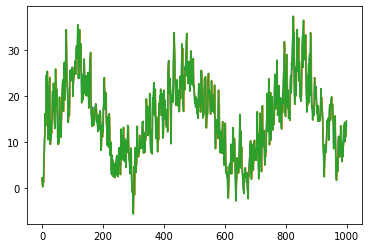

In [64]:
plt.plot(train_pred)
plt.plot(y_train_inertial.values)
plt.plot(y_train.values)

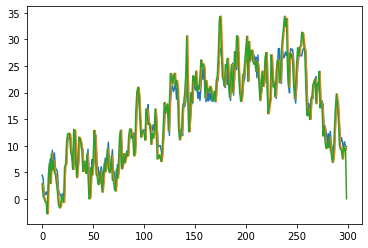

In [65]:
plt.plot(test_pred)
plt.plot(y_test_inertial.values)
plt.plot(y_test.values)

In [66]:
y_test_inertial

2466    2.92
2467    2.72
2468    0.40
2469    0.03
2470   -0.57
        ... 
2761    9.13
2762    7.50
2763    9.94
2764    9.06
2765    9.48
Name: value_at_gentime, Length: 300, dtype: float64

In [67]:
test_pred

array([ 4.4454,  3.8315,  0.7096,  0.7357,  1.3128,  0.8056,  1.0047,
        5.3922,  7.5511,  4.6441,  9.1324,  6.1506,  8.6256,  5.9096,
        5.4887,  5.1544,  1.691 ,  0.9178,  0.7634,  0.2144,  0.972 ,
        0.7616,  0.3368,  6.4093,  6.5384, 10.7815, 11.6543, 11.3865,
       11.5492,  8.9273,  8.6565,  6.3788, 11.9328, 11.3484,  6.2782,
        4.816 ,  7.3251, 11.2452, 10.9793, 10.1499,  9.1516,  5.9862,
        7.0595,  6.9725,  5.801 ,  9.3352,  5.6207,  0.6084,  1.3837,
        7.393 ,  5.9801,  7.5629, 11.2035, 11.8646,  5.4448,  5.9394,
        3.7753,  4.5912,  6.0273,  4.8588,  1.9483,  5.6903,  7.6575,
        6.6094,  7.6032, 10.623 ,  7.0629,  5.7421,  6.4993,  9.2393,
        5.0965,  5.0601,  2.485 ,  2.179 ,  6.4354,  4.6073,  6.2743,
       11.5919, 10.9084,  6.0889,  6.6734,  8.2785,  7.459 ,  8.9642,
        8.6159,  8.5611, 11.7228, 11.8562, 11.3967, 12.05  , 12.3757,
        9.5545,  9.6583, 16.5279, 17.9779, 20.9046, 17.7292, 14.0054,
       12.5869, 12.7

In [69]:
features.columns.tolist()

['value_at_gentime__ar_coefficient__coeff_0__k_10',
 'value_at_gentime__mean_change',
 'value_at_gentime__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0',
 'value_at_gentime__time_reversal_asymmetry_statistic__lag_1',
 'value_at_gentime__time_reversal_asymmetry_statistic__lag_2',
 'value_at_gentime__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.0',
 'value_at_gentime__time_reversal_asymmetry_statistic__lag_3',
 'value_at_gentime__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"mean"',
 'value_at_gentime__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
 'value_at_gentime__mean_abs_change',
 'value_at_gentime__absolute_sum_of_changes',
 'value_at_gentime__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"min"',
 'value_at_gentime__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.2',
 'value_at_gentime__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"min"',
 'value_at_gentime__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_

https://habr.com/ru/post/428213/

https://github.com/slundberg/shap

In [70]:
import shap

In [71]:
shap.initjs()

In [72]:
explainer = shap.Explainer(clf)


In [73]:
shap_values_train = explainer.shap_values(X_train)

In [74]:
shap_values_test = explainer.shap_values(X_test)

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low).

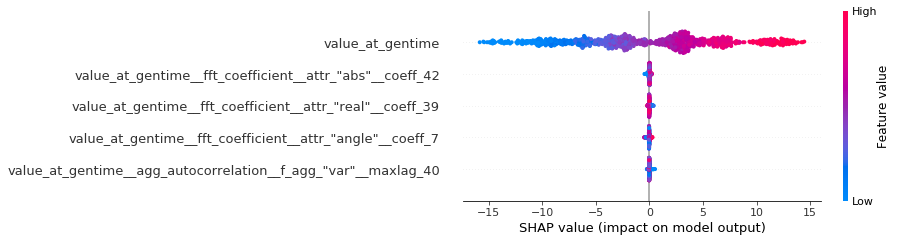

In [75]:
shap.summary_plot(shap_values_train, X_train,max_display=5)

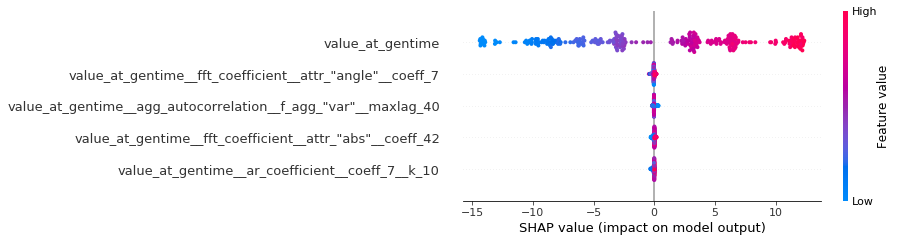

In [76]:
shap.summary_plot(shap_values_test, X_test,max_display=5)

https://www.kaggle.com/wrosinski/shap-feature-importance-with-feature-engineering

In [77]:
shap_sum = np.abs(shap_values_test).mean(axis=0)
importance_df = pd.DataFrame([X_test.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
431,value_at_gentime,6.7184
204,"value_at_gentime__fft_coefficient__attr_""angle...",0.0509195
80,"value_at_gentime__agg_autocorrelation__f_agg_""...",0.0469073
372,"value_at_gentime__fft_coefficient__attr_""abs""_...",0.0434533
421,value_at_gentime__ar_coefficient__coeff_7__k_10,0.0414738
...,...,...
281,value_at_gentime__ratio_beyond_r_sigma__r_3,0.000141066
61,value_at_gentime__count_above__t_0,0.000139991
404,value_at_gentime__large_standard_deviation__r_...,0.000126832
394,value_at_gentime__lempel_ziv_complexity__bins_2,5.09096e-05


In [78]:
shap_values_train

array([[-9.14427311e-03,  9.46350243e-04,  3.72530095e-04, ...,
         7.26772055e-04,  1.51974339e-03, -1.35539709e+01],
       [-1.26888297e-02,  1.64044926e-03, -1.22861281e-03, ...,
         6.66414703e-04,  9.50965035e-05, -1.29918541e+01],
       [-1.07737164e-02,  1.77472134e-03, -2.36206096e-03, ...,
         7.53691367e-04,  1.71015879e-03, -1.33610844e+01],
       ...,
       [-5.96545953e-03, -1.33368339e-04, -8.79666035e-04, ...,
         4.56614442e-03, -1.36932047e-02, -2.88851040e+00],
       [-5.89122769e-03, -1.37742987e-03, -3.42331144e-03, ...,
         4.19990933e-04, -1.92753043e-02, -2.83365984e+00],
       [-9.73593334e-03,  1.21997955e-03, -3.55226238e-03, ...,
         8.29726769e-04,  4.34980680e-03, -2.30876857e+00]])

In [79]:
train_pred[0], y_train.iloc[0]

(1.8227000000000007, 2.21)

In [80]:
shap.plots.force(explainer.expected_value, shap_values_train[0])

In [81]:
shap.plots.force(explainer.expected_value, shap_values_test[0])

In [82]:
test_pred[0], y_test.iloc[0]

(4.445400000000002, 2.72)

In [83]:
importance_df.column_name[0:10].values.tolist()

['value_at_gentime',
 'value_at_gentime__fft_coefficient__attr_"angle"__coeff_7',
 'value_at_gentime__agg_autocorrelation__f_agg_"var"__maxlag_40',
 'value_at_gentime__fft_coefficient__attr_"abs"__coeff_42',
 'value_at_gentime__ar_coefficient__coeff_7__k_10',
 'value_at_gentime__spkt_welch_density__coeff_8',
 'value_at_gentime__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var"',
 'value_at_gentime__fft_coefficient__attr_"real"__coeff_39',
 'value_at_gentime__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"var"',
 'value_at_gentime__fft_coefficient__attr_"abs"__coeff_20']

In [84]:
top_fstr_shap_slice = importance_df.column_name[0:10].values.tolist()
clf_top_fstr_shap = RandomForestRegressor(random_state=42)
clf_top_fstr_shap.fit(X_train[top_fstr_shap_slice], y_train)
clf_top_fstr_shap_train_pred = clf_top_fstr_shap.predict(X_train[top_fstr_shap_slice])
clf_top_fstr_shap_test_pred = clf_top_fstr_shap.predict(X_test[top_fstr_shap_slice])

clf_top_fstr_shap_train_q =  quality(
    df=pd.DataFrame(
        {"clf_top_fstr_shap_train_pred": clf_top_fstr_shap_train_pred, "target_value": y_train}
    ), pred_name="clf_top_fstr_shap_train_pred", target_name="target_value")


clf_top_fstr_shap_test_q =  quality(
    df=pd.DataFrame(
        {"clf_top_fstr_shap_test_pred": clf_top_fstr_shap_test_pred, "target_value": y_test}
    ), pred_name="clf_top_fstr_shap_test_pred", target_name="target_value")




In [85]:
clf_top_fstr_shap_train_q

Namespace(mae=0.9498038000000001, mape=3355632082353.8657, median_ae=0.7590999999999877, prediction_name='clf_top_fstr_shap_train_pred', rmse=1.2400653272227233)

In [86]:
clf_train_q

Namespace(mae=0.9456464999999998, mape=1903221202526.8804, median_ae=0.7811000000000199, prediction_name='train_pred', rmse=1.2298538428650778)

In [87]:
clf_top_fstr_shap_test_q

Namespace(mae=2.7487146666666673, mape=134866295641114.8, median_ae=2.218350000000002, prediction_name='clf_top_fstr_shap_test_pred', rmse=3.4925046433183167)

In [88]:
clf_test_q


Namespace(mae=2.598989333333333, mape=147354777407813.34, median_ae=2.328, prediction_name='test_pred', rmse=3.255778839960315)

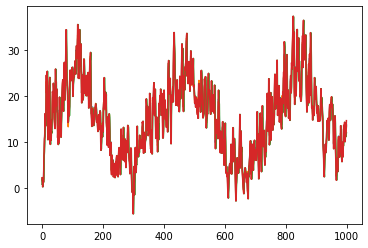

In [89]:
plt.plot(train_pred)
plt.plot(clf_top_fstr_shap_train_pred)
plt.plot(y_train_inertial.values)
plt.plot(y_train.values)

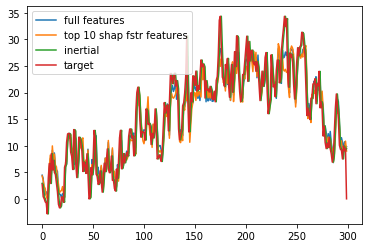

In [90]:
plt.plot(test_pred, label="full features")
plt.plot(clf_top_fstr_shap_test_pred, label="top 10 shap fstr features")
plt.plot(y_test_inertial.values, label="inertial")
plt.plot(y_test.values, label="target")

plt.legend()